In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/workspaces/Advanced-Data-Analyst-Projects/employee-attrition-prediction/data/employee_cleaned.csv")

In [3]:
print("Dataset Shape:", df.shape)
display(df.head())
display(df.describe())

Dataset Shape: (150, 21)


,Age,EducationLevel,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,PerformanceRating,TrainingTimesLastYear,OverTime,DistanceFromHome,...,Gender_Male,Gender_Other,Department_HR,Department_IT,Department_R&D,Department_Sales,JobRole_Engineer,JobRole_Executive,JobRole_Manager,JobRole_Technician
0,50,Bachelor,2,92506,2,3,4,3,0,22,...,False,True,False,False,True,False,False,True,False,False
1,36,Bachelor,14,66157,4,4,5,5,0,28,...,True,False,True,False,False,False,False,True,False,False
2,29,Bachelor,7,79917,3,4,3,3,0,9,...,False,False,False,False,False,True,False,False,False,False
3,42,Bachelor,4,117738,2,3,4,5,0,26,...,False,False,False,False,False,False,True,False,False,False
4,40,Bachelor,3,108122,3,3,1,2,0,9,...,True,False,False,False,False,True,False,False,True,False


,Age,YearsAtCompany,MonthlyIncome,JobSatisfaction,WorkLifeBalance,PerformanceRating,TrainingTimesLastYear,OverTime,DistanceFromHome,Attrition
count,150.0000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,40.2400,6.793333,70314.773333,2.633333,2.720000,3.140000,2.640000,0.260000,19.933333,0.206667
std,10.9995,4.498018,27160.590614,1.025950,0.970159,0.990085,1.643699,0.440104,11.798457,0.406271
min,22.0000,0.000000,25126.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,30.0000,3.000000,45658.250000,2.000000,2.000000,3.000000,1.000000,0.000000,9.000000,0.000000
50%,42.0000,7.000000,71180.000000,3.000000,3.000000,3.000000,3.000000,0.000000,20.000000,0.000000
75%,49.0000,11.000000,93127.750000,3.000000,3.000000,4.000000,4.000000,1.000000,30.750000,0.000000
max,59.0000,14.000000,119270.000000,4.000000,4.000000,5.000000,5.000000,1.000000,39.000000,1.000000


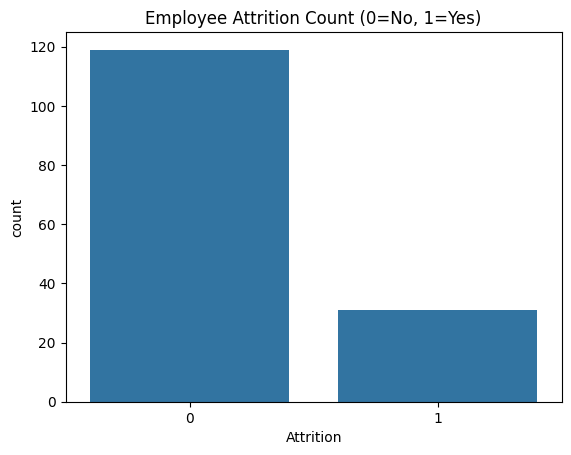

In [4]:
sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Count (0=No, 1=Yes)')
plt.show()

In [5]:
if 'Department_Human Resources' in df.columns:
    dept_cols = [col for col in df.columns if 'Department_' in col]
    df['Department'] = df[dept_cols].idxmax(axis=1).str.replace('Department_', '')
    sns.countplot(x='Department', hue='Attrition', data=df)
    plt.title('Attrition by Department')
    plt.xticks(rotation=45)
    plt.show()

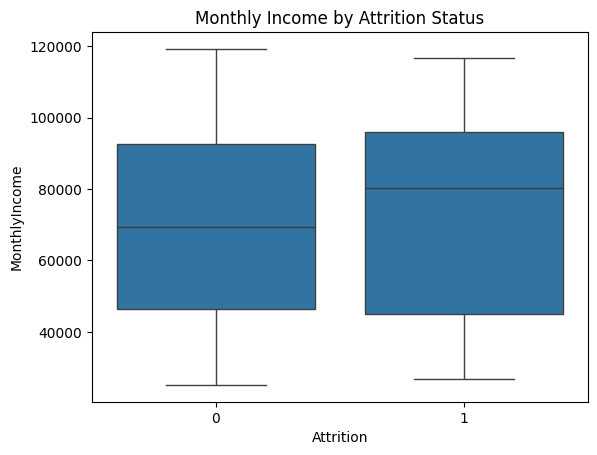

In [6]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition Status')
plt.show()

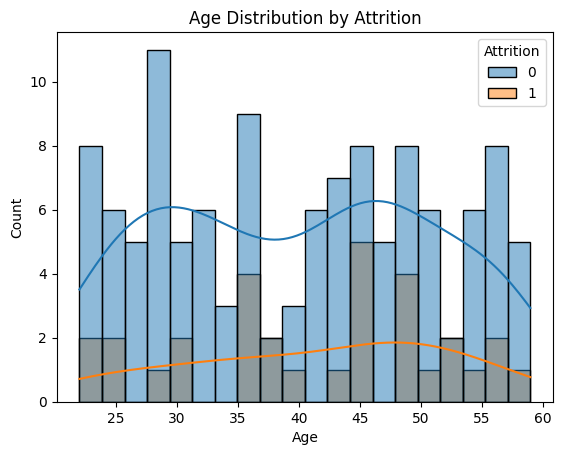

In [7]:
sns.histplot(data=df, x='Age', hue='Attrition', kde=True, bins=20)
plt.title('Age Distribution by Attrition')
plt.show()

/tmp/ipykernel_22155/1540915325.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Attrition'] == 1]['YearsAtCompany'], label='Attrited', shade=True)
/tmp/ipykernel_22155/1540915325.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Attrition'] == 0]['YearsAtCompany'], label='Stayed', shade=True)


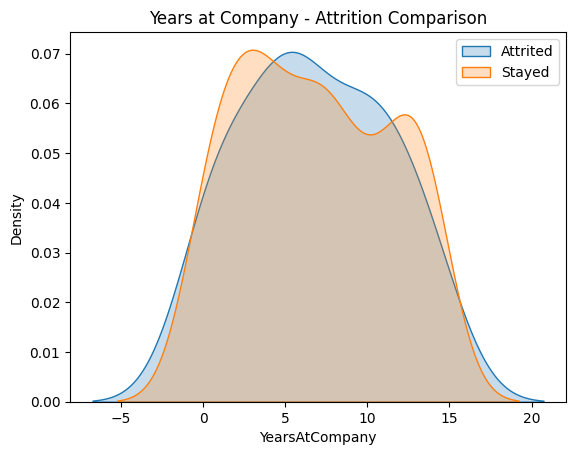

In [8]:
sns.kdeplot(data=df[df['Attrition'] == 1]['YearsAtCompany'], label='Attrited', shade=True)
sns.kdeplot(data=df[df['Attrition'] == 0]['YearsAtCompany'], label='Stayed', shade=True)
plt.title('Years at Company - Attrition Comparison')
plt.xlabel('YearsAtCompany')
plt.legend()
plt.show()

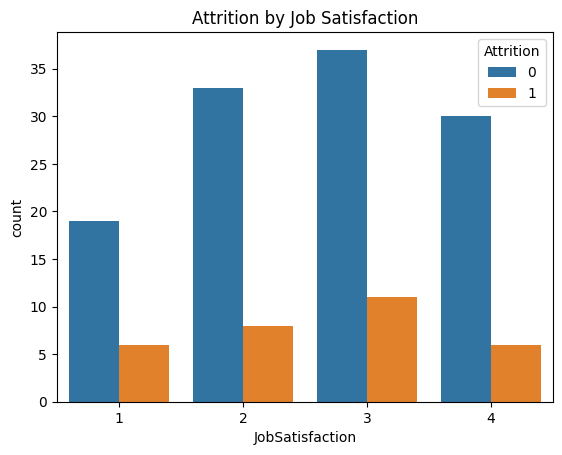

In [9]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

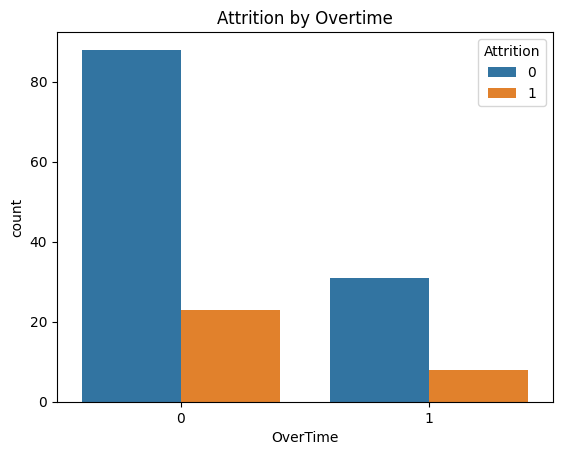

In [10]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition by Overtime')
plt.show()

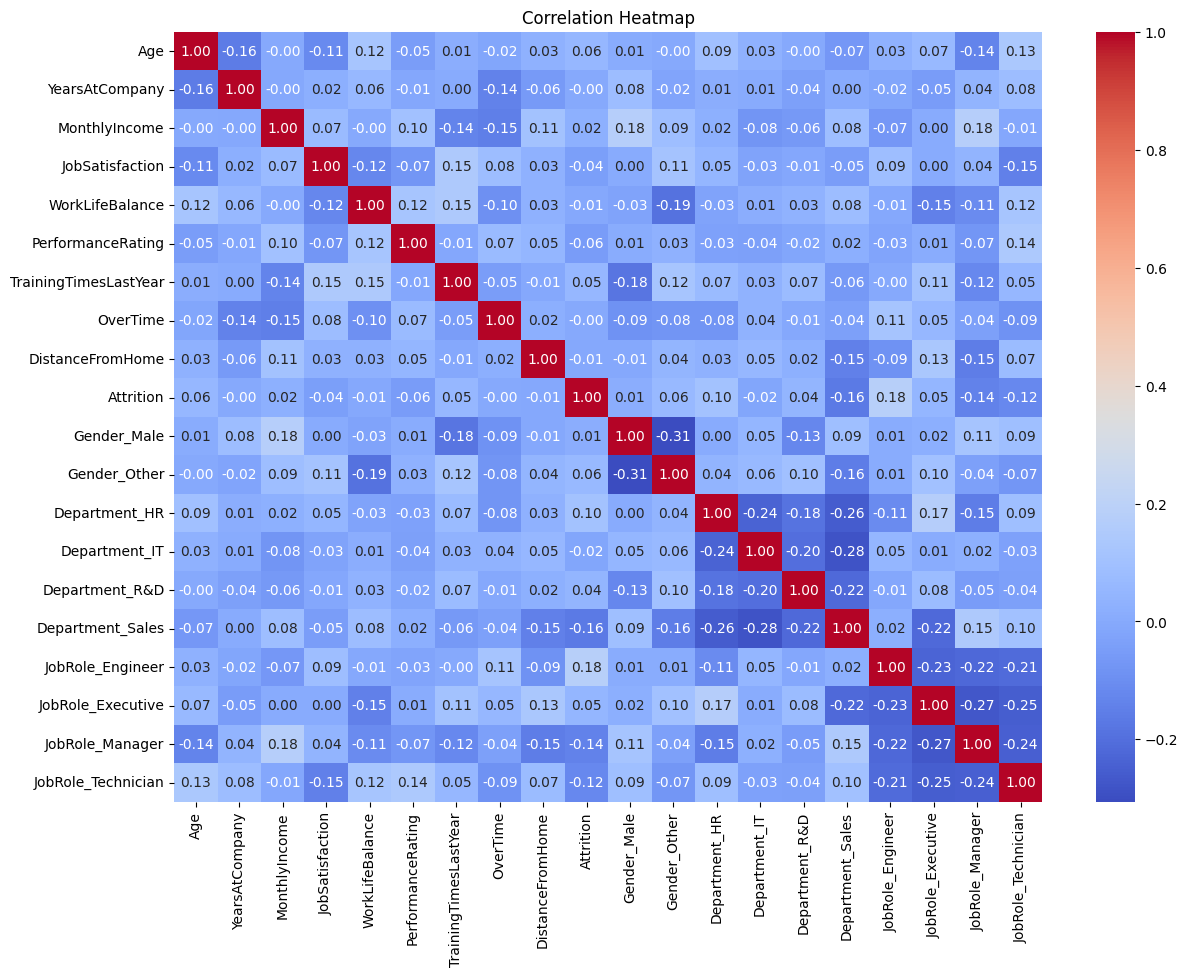

In [11]:
plt.figure(figsize=(14, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()